In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
train = pd.read_csv("train.csv")
org_train = pd.read_csv("train__dataset.csv")

train = pd.concat([train, org_train])
test = pd.read_csv("test.csv")
ids = test['id']

df = pd.concat([train, test])

In [56]:
df = df.drop(columns = 'id')

In [57]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].apply(lambda s: f'type_{s}')
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda s: f'type_{s}')
df['market_segment_type'] = df['market_segment_type'].apply(lambda s: f'type_{s}')

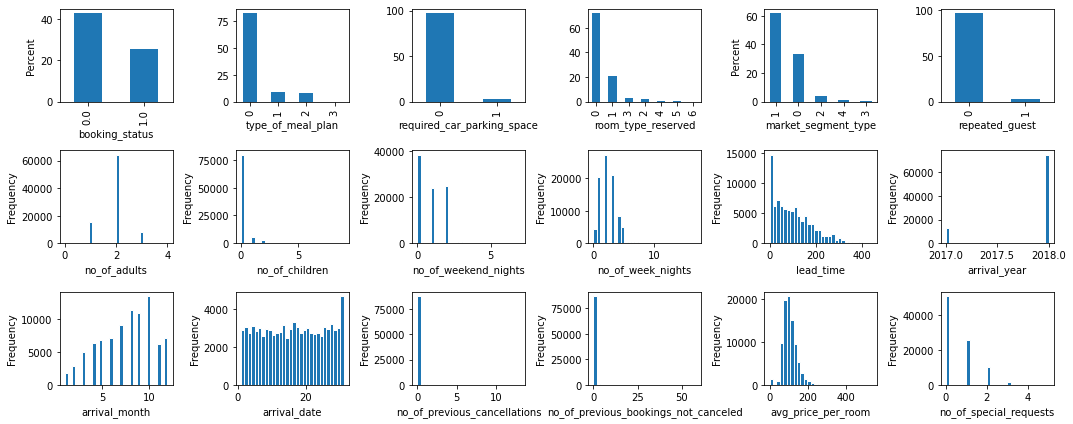

In [58]:
categorical = ['booking_status', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest']
numerical = df.drop(columns = categorical).columns

fig, axes = plt.subplots(3, 6, figsize=(15, 6))
axes = axes.flatten()
axes[0].set_ylabel('Percent')
axes[4].set_ylabel('Percent')
axes[8].set_ylabel('Percent')
for i, col in enumerate(categorical):
    (100* df[col].value_counts() / len(df)).plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    
for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

In [59]:
df_dummy = pd.get_dummies(df)

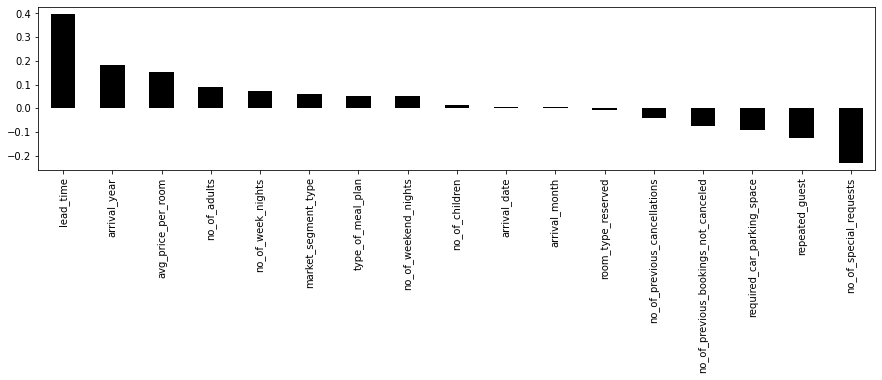

In [60]:
df_dummy.corr()['booking_status'].sort_values(ascending=False)[1:].plot.bar(figsize=(15,3), cmap='copper')
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_dummy.drop(columns='booking_status')
y = df_dummy['booking_status']

features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

print("Training score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation score: ", metrics.accuracy_score(y_valid, y_valid_pred))

Training score:  0.7747895173722281
Validation score:  0.7722443559096945


In [63]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print("Training score: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation score: ", metrics.accuracy_score(y_valid, y_valid_pred))

Training score:  0.8732360962883908
Validation score:  0.8421314741035857


In [52]:
final_model = XGBClassifier()
model.fit(X, y)
print("Training score: ", metrics.f1_score(y, model.predict(X)))
y_test_pred = model.predict(X_test)

Training score:  0.8140543007072781


In [53]:
output = pd.DataFrame({'id': ids, 'booking_status': y_test_pred})

In [54]:
output.to_csv("Submission2.csv", index=False)